## Context Background:

Over the years, U.S. politics has been heavily influenced by the spread of misinformation, especially on social media and online news platforms. Fake news has played a big role in shaping how people see political events and issues, often leading to confusion and distrust. With so much content out there, it’s becoming harder for people to tell what’s real and what’s fake. In today’s world of free speech, it’s more important than ever to have tools that help people sort fact from fiction in political news.

## Problem Statement:

The constant flow of political news online makes it tough to know what's accurate and what’s not. Over time, fake news has been used to steer public opinion and deepen political divides, creating a lot of mistrust. The challenge is to create a system that can reliably figure out whether a political news article is real or fake, just from its title or text. Existing methods for spotting fake news haven’t kept pace with the rapid spread of misinformation in the political landscape.

## Objective:

The goal is to develop a machine learning model that can accurately tell if a political news article is real or fake, using either the title or the full text. This project aims to help people become more aware of misinformation in U.S. politics, so they can make better-informed decisions. By building this tool, we hope to fight the spread of fake news and make sure political discussions are grounded in reliable, trustworthy information.


In [1]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
df = pd.read_csv("fake_or_real_news.csv")

In [217]:
df.head(2)

Unnamed: 0  \
0        8476   
1       10294   

                                                                                   title  \
0                                                           You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [81]:
df[df.duplicated()]

,Unnamed: 0,title,text,label


In [227]:
df["label"].replace({"FAKE":1,"REAL":0},inplace=True)
df.head(2)

Unnamed: 0  \
0        8476   
1       10294   

                                                                                   title  \
0                                                           You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [264]:
df["label"].value_counts(normalize=True)

label
0    0.500552
1    0.499448
Name: proportion, dtype: float64

In [3]:
import re
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from PIL import Image
from nltk.stem.porter import PorterStemmer
pd.options.display.max_colwidth = None

# Defining functions

texts will be processed by :
- lower casing
- expanding contraction
- removing numbers
- removing punctuations
- removing white spaces
- removing stopwords
- stemming or lemmatizing (lemmatize will be used for wordcloud to retain word meaning)

In [4]:
# listing the contractions
contractions_dict = { "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because","could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not",
"doesn't": "does not", "don't": "do not",
"hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he had",
"he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I had", "I'd've": "I would", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have", "it'll": "it will", "it'll've": "iit will have", "it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she had",
"she'd've": "she would have", "she'll": "she will",
"she'll've": "she will have", "she's": "she is",
"should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
"so's": "so is",
"that'd": "that had", "that'd've": "that would have", "that's": "that is",
"there'd": "there had", "there'd've": "there would have", "there's": "there is",
"they'd": "they had", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not","we'd": "we had",
"we'd've": "we would have", "we'll": "we will",
"we'll've": "we will have", "we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will", "what'll've": "what will have", "what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have", "who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
"y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you had",
"you'd've": "you would have", "you'll": "you will",
"you'll've": "you will have", "you're": "you are",
"you've": "you have"
}

In [5]:
#define lowercase function
def to_lower(text):
    return text.lower()

In [6]:
#define contraction function
def expand_match(text):
    match = text.group(0)
    expanded_text = contractions_dict.get(match) if contractions_dict.get(match) else contractions_dict.get(match.lower())
    return expanded_text

def expand_contractions(text,contractions_dict):
    contractions_pattern = re.compile("({})".format("|".join(contractions_dict.keys())))
    expanded_text = contractions_pattern.sub(expand_match,text)
    expanded_text = re.sub("'","",expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text,contractions_dict)
    return text

In [7]:
#define number removal function
def remove_number(text):
    output = "".join(c for c in text if not c.isdigit())
    return output

In [8]:
#define punctuation removal
def remove_punct(text):
    return "".join(c for c in text if c not in punctuation)

In [9]:
#define whitespace removal
def to_strip(text):
    return " ".join(text.split())

In [10]:
# define stopwords removal
def remove_stopwords(text):
    stop_words =stopwords.words("english")
    stop_words.remove("not")
    return " ".join(c for c in nltk.word_tokenize(text) if c not in stop_words)

In [74]:
#define Wordcloud function

from wordcloud import WordCloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")

In [75]:
#define stemmer
word_porter_stemmer = SnowballStemmer(language="english")

def snow_stem(text):
    stemmed_words =[word_porter_stemmer.stem(i)for x in nltk.sent_tokenize(text) for i in nltk.word_tokenize(x)]
    return " ".join(stemmed_words)

In [76]:
#define lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    lemmatizeed_words = [wordnet_lemmatizer.lemmatize(i) for x in nltk.sent_tokenize(text) for i in nltk.word_tokenize(x)]
    return " ".join(lemmatizeed_words)


In [80]:
#define word frequency function
def freq_check(text):
    text = text.str.extractall("([a-zA-Z]+)")
    text.columns = ["text"]
    b = text.reset_index(drop=True)
    text = b["text"].value_counts()

    temp = {"word":text.index,"freq":text.values}
    temp = pd.DataFrame(temp)
    temp.index = temp["word"]
    temp.drop("word",axis=1,inplace=True)
    temp.sort_values(by="freq",ascending=False,inplace=True)
    return temp

# Checking by title

In [57]:
df_title = df[["title","label"]]
df_title

,title,label
0,You Can Smell Hillary’s Fear,1
1,Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO),1
2,Kerry to go to Paris in gesture of sympathy,0
3,Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!',1
4,The Battle of New York: Why This Primary Matters,0
...,...,...
6330,State Department says it can't find emails from Clinton IT specialist,0
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ or ‘Pentagon’,1
6332,Anti-Trump Protesters Are Tools of the Oligarchy : Information,1
6333,"In Ethiopia, Obama seeks progress on peace, security in East Africa",0


In [58]:
#apply everything
pd.options.display.max_colwidth = None
df_title["prep1"] = df_title["title"].apply(to_lower)
df_title["prep2"] = df_title["prep1"].apply(main_contraction)
df_title["prep3"] = df_title["prep2"].apply(remove_number)
df_title["prep4"] = df_title["prep3"].apply(remove_punct)
df_title["prep5"] = df_title["prep4"].apply(to_strip)
df_title["prep6"] = df_title["prep5"].apply(remove_stopwords)

/var/folders/dz/1xdxcyhn3d1740p67b4ktyzr0000gn/T/ipykernel_13899/1277497665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title["prep1"] = df_title["title"].apply(to_lower)


In [60]:
df_title = df_title[["prep6","label"]].rename({"prep6":"title"},axis=1)
df_title["title"] = df_title["title"].apply(lemmatize)
df_title

,title,label
0,smell hillary ’ fear,1
1,watch exact moment paul ryan committed political suicide trump rally video,1
2,kerry go paris gesture sympathy,0
3,bernie supporter twitter erupt anger dnc tried warn,1
4,battle new york primary matter,0
...,...,...
6330,state department say not find email clinton specialist,0
6331,‘ p ’ pb stand ‘ plutocratic ’ ‘ pentagon ’,1
6332,antitrump protester tool oligarchy information,1
6333,ethiopia obama seek progress peace security east africa,0


### title wordcloud by label

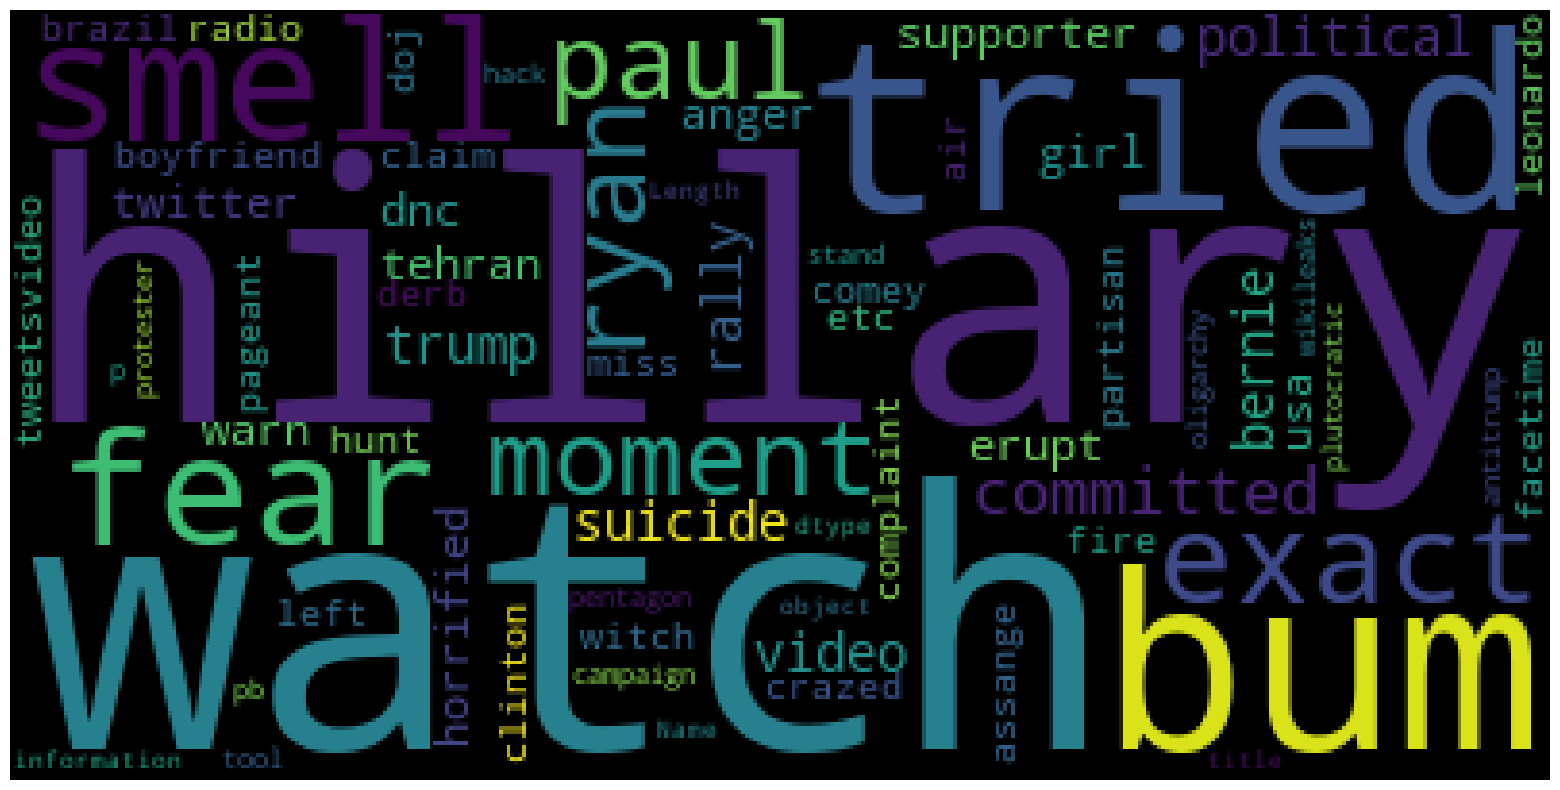

In [68]:
#fake news
word_cloud_fake = WordCloud(random_state=1).generate(str(df_title["title"][df_title["label"]==1]))
plot_cloud(word_cloud_fake)

<Axes: xlabel='freq', ylabel='word'>

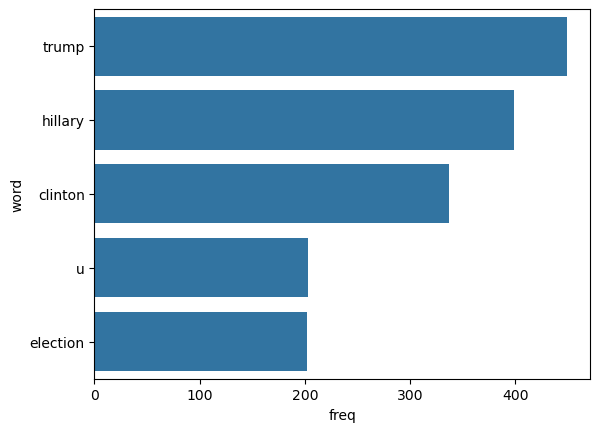

In [323]:
freq_title_fake = freq_check(df_title["title"][df_title["label"]==1])
sns.barplot(freq_title_fake.head(5),x="freq",y="word",orient="h")

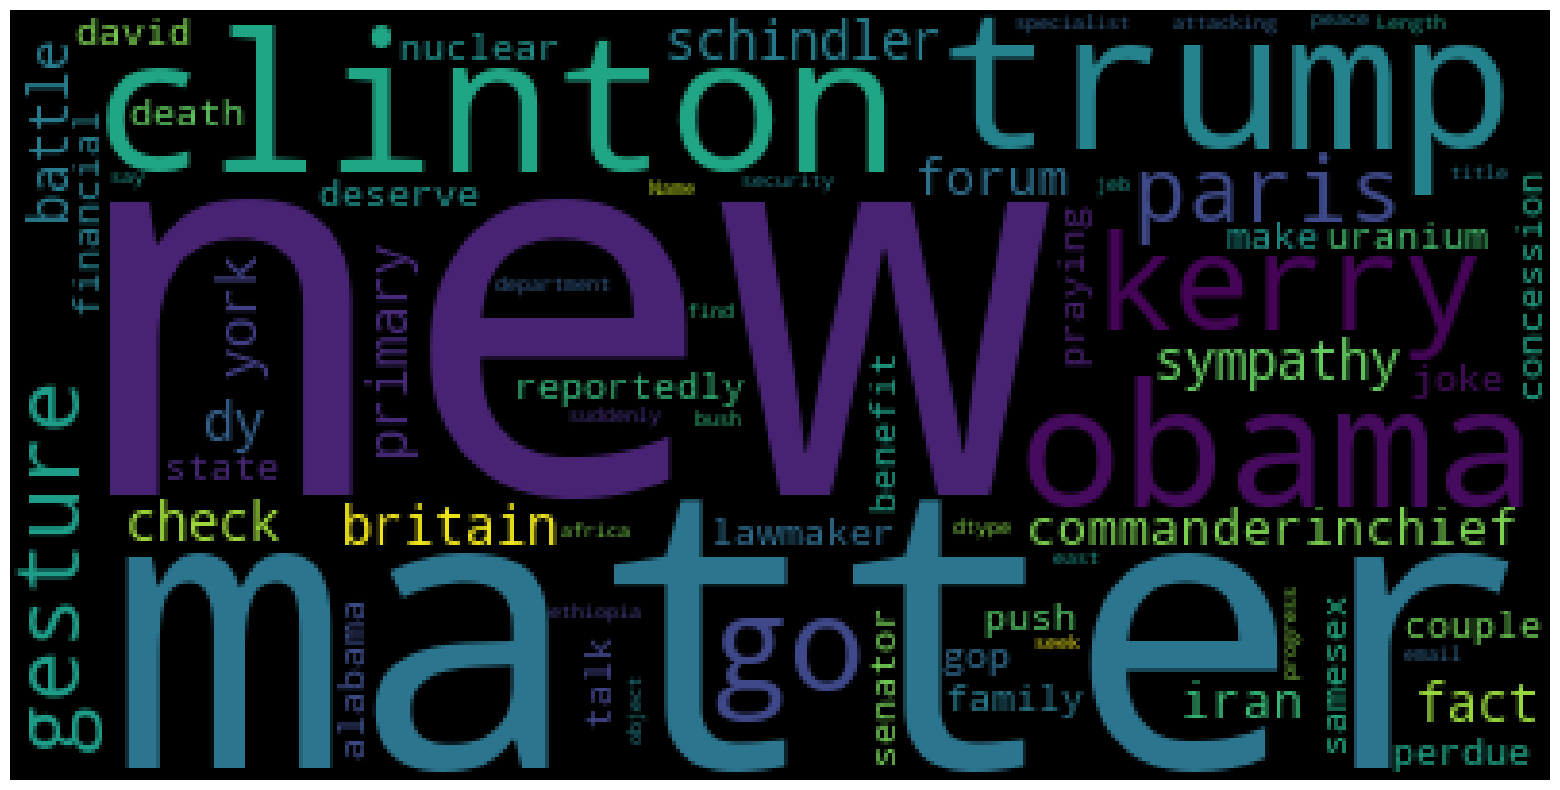

In [292]:
#real news
word_cloud_real = WordCloud(random_state=1).generate(str(df_title["title"][df_title["label"]==0]))
plot_cloud(word_cloud_real)

<Axes: xlabel='freq', ylabel='word'>

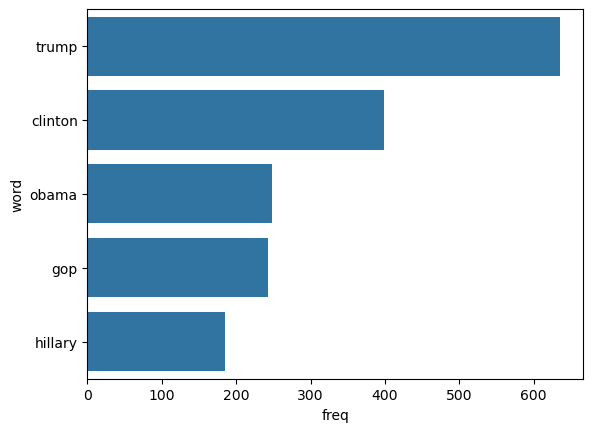

In [324]:
freq_title_real = freq_check(df_title["title"][df_title["label"]==0])
sns.barplot(freq_title_real.head(5),x="freq",y="word",orient="h")

In [326]:
freq_title_fake = freq_title_fake.reset_index()
freq_title_real = freq_title_real.reset_index()
freq_title_merge = freq_title_real.merge(freq_title_fake,how="inner",on="word")
freq_title_merge = freq_title_merge.rename({"freq_x":"freq_real","freq_y":"freq_fake"},axis=1)
freq_title_merge["real/fake"] = round(freq_title_merge["freq_real"]/freq_title_merge["freq_fake"],2)

In [329]:
freq_title_merge.drop(["index_x","index_y"],axis=1).head(10).sort_values(by="real/fake",ascending=False)

,word,freq_real,freq_fake,real/fake
3,gop,243,17,14.29
7,debate,165,14,11.79
8,republican,163,29,5.62
2,obama,248,76,3.26
5,donald,185,84,2.20
0,trump,635,449,1.41
6,not,166,121,1.37
1,clinton,399,337,1.18
9,new,141,139,1.01
4,hillary,185,399,0.46


By title , GOP is the most common word that is most frequently used in real news compared with fake news (14.29 times), followed by DEBATE (11.79 times).

# Checking by text

In [228]:
df_text = df[["text","label"]]
df_text.head(2)

text  \
0  Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entire left-wing establishment will form a lynch mob if they continue going after Hillary. And the FBI’s credibility is being attacked by the media and the Democrats to preemptively head off the results of the investigation of the Clinton Foundation and Hillary Clinton. \nThe covert struggle between FBI agents and Obama’s DOJ people has gone explosively public. \nThe New York Times has compared Comey to J. Edgar Hoover. Its bizarre headline, “James Comey Role Recalls Hoover’s FBI, Fairly or Not” practically admits up front that it’s spouting nonsense. The Boston Globe has published a column calling for Comey’s resignation. Not to be outdone, Time has an editorial claiming that the scandal is really an attack on all women. \nJames Carville appeared on MSNBC to remind everyone that he was still alive and insane. He accused Comey of coordinating with House Republicans and the KGB. And you thought the “vast right wing conspiracy” was a stretch. \nCountless media stories charge Comey with violating procedure. Do you know what’s a procedural violation? Emailing classified information stored on your bathroom server. \nSenator Harry Reid has sent Comey a letter accusing him of violating the Hatch Act. The Hatch Act is a nice idea that has as much relevance in the age of Obama as the Tenth Amendment. But the cable news spectrum quickly filled with media hacks glancing at the Wikipedia article on the Hatch Act under the table while accusing the FBI director of one of the most awkward conspiracies against Hillary ever. \nIf James Comey is really out to hurt Hillary, he picked one hell of a strange way to do it. \nNot too long ago Democrats were breathing a sigh of relief when he gave Hillary Clinton a pass in a prominent public statement. If he really were out to elect Trump by keeping the email scandal going, why did he trash the investigation? Was he on the payroll of House Republicans and the KGB back then and playing it coy or was it a sudden development where Vladimir Putin and Paul Ryan talked him into taking a look at Anthony Weiner’s computer? \nEither Comey is the most cunning FBI director that ever lived or he’s just awkwardly trying to navigate a political mess that has trapped him between a DOJ leadership whose political futures are tied to Hillary’s victory and his own bureau whose apolitical agents just want to be allowed to do their jobs. \nThe only truly mysterious thing is why Hillary and her associates decided to go to war with a respected Federal agency. Most Americans like the FBI while Hillary Clinton enjoys a 60% unfavorable rating. \nAnd it’s an interesting question. \nHillary’s old strategy was to lie and deny that the FBI even had a criminal investigation underway. Instead her associates insisted that it was a security review. The FBI corrected her and she shrugged it off. But the old breezy denial approach has given way to a savage assault on the FBI. \nPretending that nothing was wrong was a bad strategy, but it was a better 

In [229]:
pd.options.display.max_colwidth = None
df_text["prep1"] = df_text["text"].apply(to_lower)
df_text["prep2"] = df_text["prep1"].apply(main_contraction)
df_text["prep3"] = df_text["prep2"].apply(remove_number)
df_text["prep4"] = df_text["prep3"].apply(remove_punct)
df_text["prep5"] = df_text["prep4"].apply(to_strip)
df_text["prep6"] = df_text["prep5"].apply(remove_stopwords)

df_text = df_text[["prep6","label"]].rename({"prep6":"text"},axis=1)
df_text["text"] = df_text["text"].apply(lemmatize)
df_text.head(1)

/var/folders/dz/1xdxcyhn3d1740p67b4ktyzr0000gn/T/ipykernel_13899/3127459121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["prep1"] = df_text["text"].apply(to_lower)


text  \
0  daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam final stretch election hillary rodham clinton gone war fbi word “ unprecedented ” thrown around often election ought retired ’ still unprecedented nominee major political party go war fbi ’ exactly hillary people done coma patient waking watching hour cnn hospital bed would assume fbi director james comey hillary ’ opponent election fbi attack everyone obama cnn hillary ’ people circulated letter attacking comey currently medium hit piece lambasting targeting trump ’ surprising clinton ally start running attack ad fbi fbi ’ leadership warned entire leftwing establishment form lynch mob continue going hillary fbi ’ credibility attacked medium democrat preemptively head result investigation clinton foundation hillary clinton covert struggle fbi agent obama ’ doj people gone explosively public new york time compared comey j edgar hoover bizarre headline “ james comey role recall hoover ’ fbi fairly not ” practically admits front ’ spouting nonsense boston globe published column calling comey ’ resignation not outdone time editorial claiming scandal really attack woman james carville appeared msnbc remind everyone still alive insane accused comey coordinating house republican kgb thought “ vast right wing conspiracy ” stretch countless medium story charge comey violating procedure know ’ procedural violation emailing classified information stored bathroom server senator harry reid sent comey letter accusing violating hatch act hatch act nice idea much relevance age obama tenth amendment cable news spectrum quickly filled medium hack glancing wikipedia article hatch act table accusing fbi director one awkward conspiracy hillary ever james comey really hurt hillary picked one hell strange way not long ago democrat breathing sigh relief gave hillary clinton pas prominent public statement really elect trump keeping email scandal going trash investigation payroll house republican kgb back playing coy sudden development vladimir putin paul ryan talked taking look anthony weiner ’ computer either comey cunning fbi director ever lived ’ awkwardly trying navigate political mess trapped doj leadership whose political future tied hillary ’ victory bureau whose apolitical agent want allowed job truly mysterious thing hillary associate decided go war respected federal agency american like fbi hillary clinton enjoys unfavorable rating ’ interesting question hillary ’ old strategy lie deny fbi even criminal investigation underway instead associate insisted security review fbi corrected shrugged old breezy denial approach given way savage assault fbi pretending nothing wrong bad strategy better one picking fight fbi lunatic clinton associate try claim fbi really kgb two possible explanation hillary clinton might arrogant enough lash fbi belief victory near kind hubris led plan victory firework display could lead declare war fbi irritating final mile campaign explanation people panicked going war fbi not behavior smart focused presidential campaign ’ act desperation presidential candidate decides option try destroy credibility fbi ’ not hubris ’ fear fbi might reveal original fbi investigation hillary clinton confident could ride good reason believing hillary clinton gone place paranoid wreck within short space time “ positive ” clinton campaign promising unite country replaced desperate flailing operation focused energy fighting fbi ’ one reason bizarre behavior clinton campaign decided fbi investigation latest batch email pose threat survival ’ gone fighting fbi ’ unprecedented step born fear ’ hard know whether fear justified existence fear already tell u whole lot clinton loyalist rigged old investigation knew outcome ahead time well knew debate question suddenly longer control afraid smell fear fbi wiretap investigation clinton foundation ’ finding new email time clintonworld panicked spinmeister clintonworld claimed email scandal muc

### text wordcloud by label

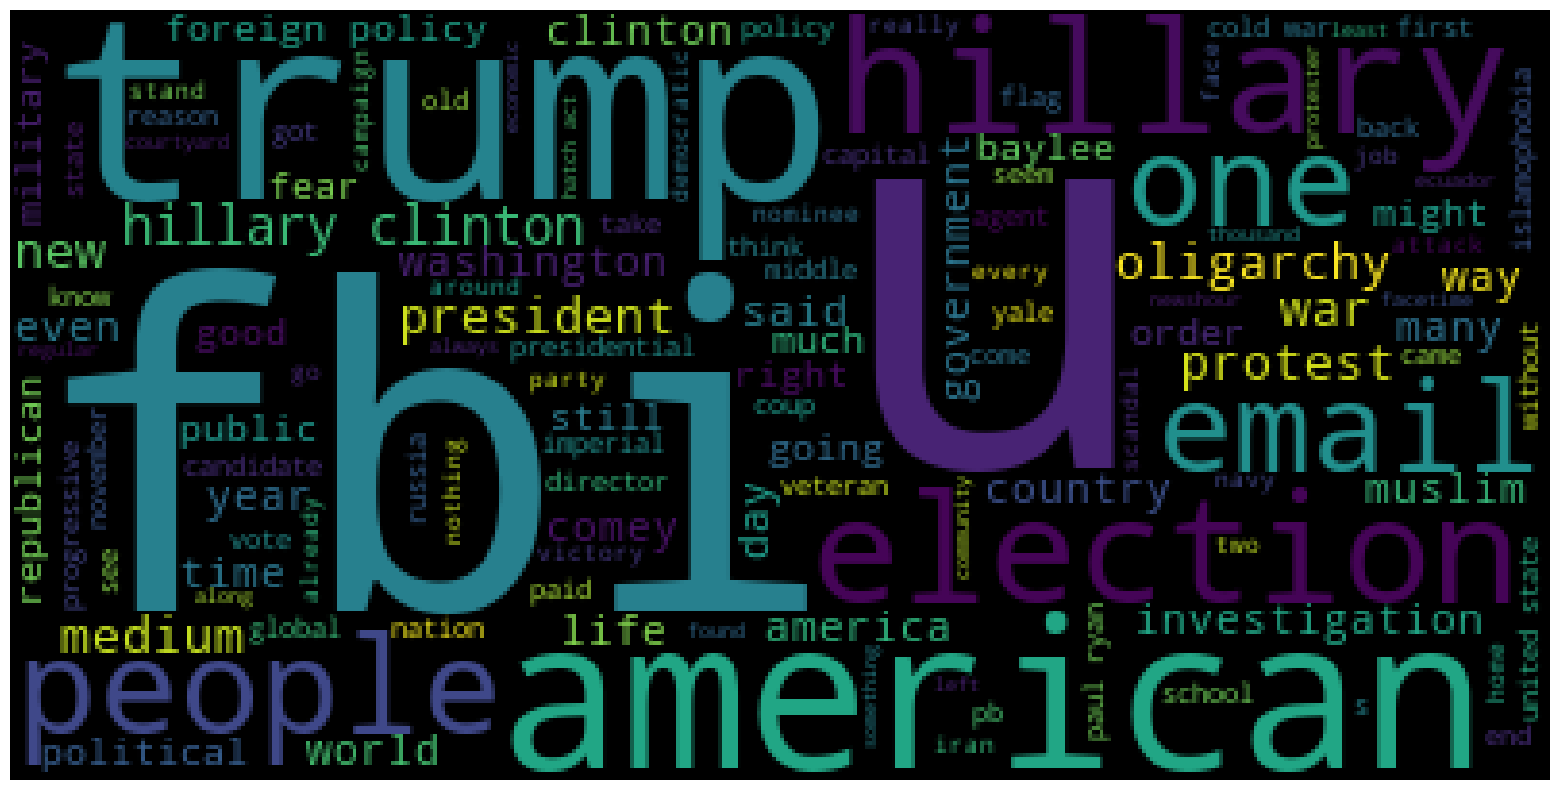

In [72]:
#fake news 
word_cloud_fake_text = WordCloud(random_state=1).generate(str(df_text["text"][df_text["label"]==1]))
plot_cloud(word_cloud_fake_text)

<Axes: xlabel='freq', ylabel='word'>

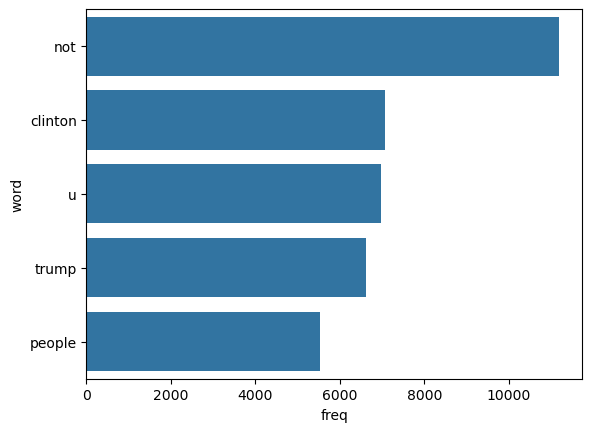

In [273]:
freq_text_fake = freq_check(df_text["text"][df_text["label"]==1])
sns.barplot(freq_text_fake.head(5),x="freq",y="word",orient="h")

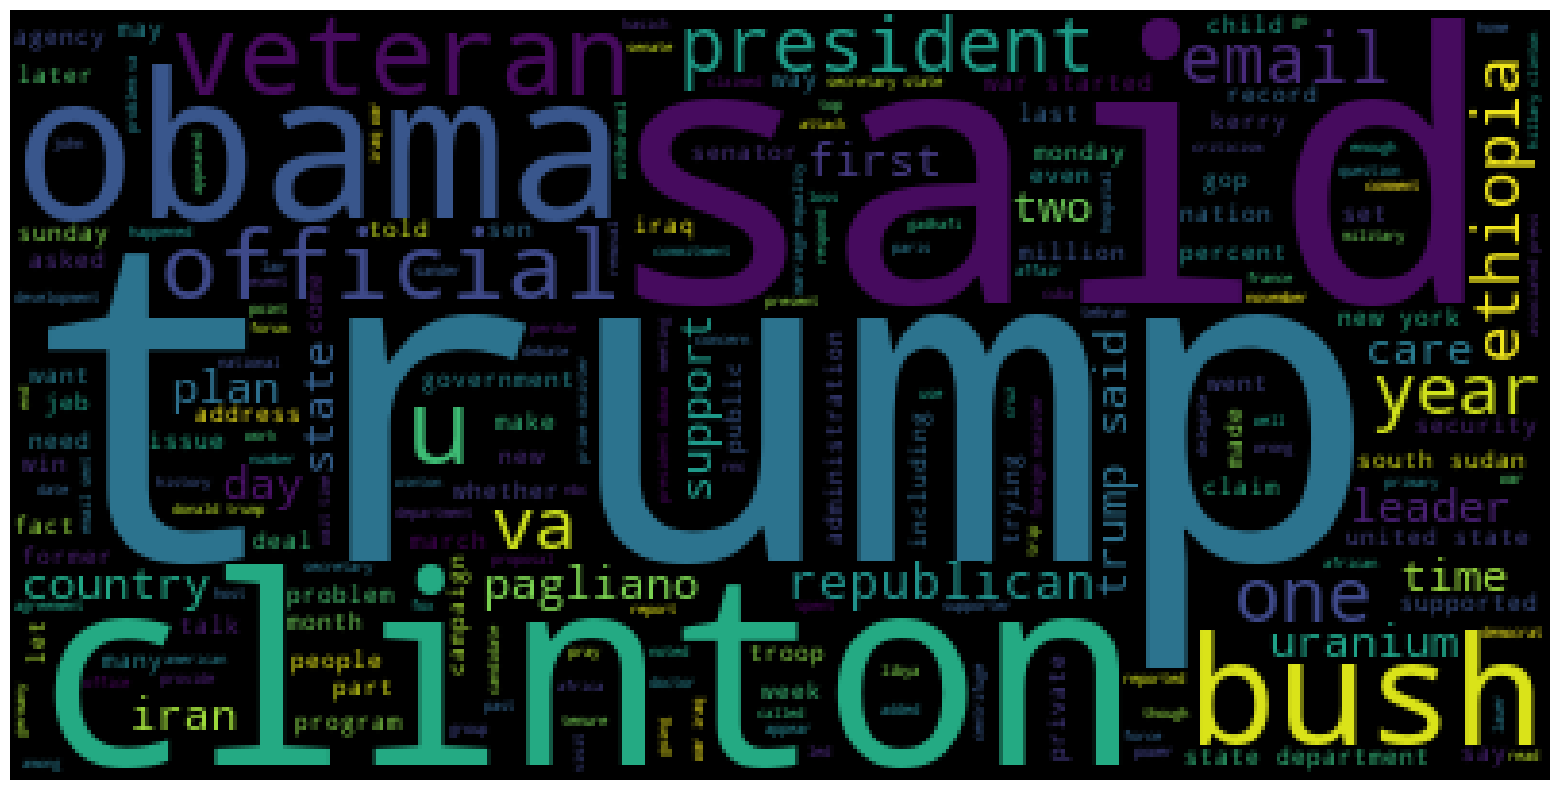

In [73]:
#real news
word_cloud_real_text = WordCloud(random_state=1).generate(str(df_text["text"][df_text["label"]==0]))
plot_cloud(word_cloud_real_text)

<Axes: xlabel='freq', ylabel='word'>

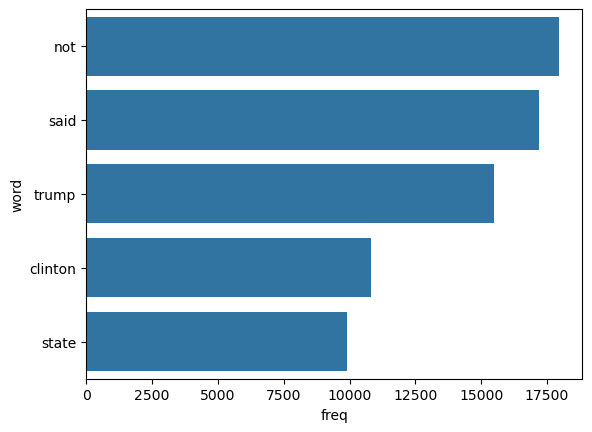

In [272]:
freq_text_real = freq_check(df_text["text"][df_text["label"]==0])
sns.barplot(freq_text_real.head(5),x="freq",y="word",orient="h")

In [271]:
freq_text_fake = freq_text_fake.reset_index()
freq_text_real = freq_text_real.reset_index()
freq_text_merge = freq_text_real.merge(freq_text_fake,how="inner",on="word")
freq_text_merge = freq_text_merge.drop("index",axis=1)
freq_text_merge = freq_text_merge.rename({"freq_x":"freq_real","freq_y":"freq_fake"},axis=1)
freq_text_merge["real/fake"] = round(freq_text_merge["freq_real"]/freq_text_merge["freq_fake"],2)
freq_text_merge.head(10).sort_values(by="real/fake",ascending=False)

,word,freq_real,freq_fake,real/fake
5,republican,8060,1398,5.77
1,said,17194,3995,4.30
9,president,6244,2626,2.38
2,trump,15472,6618,2.34
4,state,9908,5087,1.95
6,would,8026,4920,1.63
0,not,17936,11182,1.60
3,clinton,10801,7073,1.53
7,one,6646,5245,1.27
8,people,6310,5540,1.14


The most common word used in *real* news that are not in the *fake* news is REPUBLICAN, which is used 5.7 times more frequent in real news for this dataset, followed by SAID (4.3 times)

# Model Benchmarking

Benchmarking will be done on both *text* and *title* to see which one is better in classifying fake news

Model will be picked from :
- Logistic Regression
- KNN
- Decision Tree
- Random Forrest
- XGBoost

Whether it would be :
- stemmed, or
- lemmatized

And vectorized by :
- Count Vectorizer, or
- TFIDF Vectorizer

In [18]:
#import library for TF

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

Cvect = CountVectorizer()
tfidf = TfidfVectorizer()

In [24]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
from string import punctuation

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [self._preprocess_text(text) for text in X]

    def _preprocess_text(self, text):
        text = to_lower(text)
        text = main_contraction(text)
        text = remove_number(text)
        text = remove_punct(text)
        text = to_strip(text)
        text = remove_stopwords(text)
        return text

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import (
    StratifiedKFold,
    KFold,
    GridSearchCV,
    RandomizedSearchCV,
)
from sklearn.model_selection import train_test_split



logreg = LogisticRegression(random_state=0, solver="liblinear", verbose=False)
knn = KNeighborsClassifier(n_neighbors=5)
dtree = DecisionTreeClassifier(random_state=0, max_depth=5)
rf = RandomForestClassifier(random_state=0, verbose=False)
xgboost = XGBClassifier()

models = [
    ("Logistic Regression", logreg),
    ("KNN", knn),
    ("Decision Tree", dtree),
    ("Random Forest", rf),
    ("XGBoost", xgboost),
]


In [26]:
#snowball stemmer
class SnowballStem(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [snow_stem(text) for text in X]

In [27]:
#lemmatizer
class lemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [lemmatize(text) for text in X]

In [28]:
process = [SnowballStem(),lemmatizer()]
vectorizer = [Cvect,tfidf]

In [50]:
#define benchmarking function
def benchmarking(
    X_train,
    y_train,
    models,
):
    model_name= []
    process_name=[]
    vectorizer_name=[]
    scores = []
    std = []
    

    for name, model in models:
        for process_transformer in process: 
            for vectorizer_transformer in vectorizer:  
                
                pipe_model = Pipeline([
                    ("preprocessing", TextPreprocessor()),
                    ("process", process_transformer),
                    ("vectorizer", vectorizer_transformer), 
                    ("model", model) 
                ])

                # Set up cross-validation with StratifiedKFold
                skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

                # Evaluate model using cross-validation
                model_cv = cross_val_score(
                    estimator=pipe_model,
                    X=X_train,
                    y=y_train,
                    cv=skfold,
                    scoring="accuracy"
                )

                # Append results to lists
                model_name.append(name)
                process_name.append(process_transformer.__class__.__name__) 
                vectorizer_name.append(vectorizer_transformer.__class__.__name__)
                scores.append(round(model_cv.mean(), 3))
                std.append(round(model_cv.std(), 3))

    # Create a DataFrame to hold the results
    result = pd.DataFrame(
        {
            "model": model_name,
            "process": process_name,
            "vectorizer": vectorizer_name,
            "mean score": scores,
            "stdf": std
        }
    )

    # Sort results by score
    return result.sort_values("mean score", ascending=False)

### Benchmark by title

In [54]:
X_title = df["title"]
y_title = df["label"]
X_train_title, X_test_title , y_train_title , y_test_title = train_test_split(X_title,y_title,test_size=0.2,stratify=y_title,random_state=42)

In [51]:
df_benchmark_title= benchmarking(X_train_title,y_train_title,models)
df_benchmark_title

,model,process,vectorizer,mean score,stdf
3,Logistic Regression,lemmatizer,TfidfVectorizer,0.812,0.012
2,Logistic Regression,lemmatizer,CountVectorizer,0.806,0.005
1,Logistic Regression,SnowballStem,TfidfVectorizer,0.805,0.007
0,Logistic Regression,SnowballStem,CountVectorizer,0.801,0.008
14,Random Forest,lemmatizer,CountVectorizer,0.801,0.008
12,Random Forest,SnowballStem,CountVectorizer,0.801,0.006
15,Random Forest,lemmatizer,TfidfVectorizer,0.796,0.005
13,Random Forest,SnowballStem,TfidfVectorizer,0.788,0.006
17,XGBoost,SnowballStem,TfidfVectorizer,0.782,0.013
16,XGBoost,SnowballStem,CountVectorizer,0.780,0.003


### Benchmark by text

In [55]:
X_text = df["text"]
y_text = df["label"]
X_train_text, X_test_text , y_train_text , y_test_text = train_test_split(X_text,y_text,test_size=0.2,stratify=y_text,random_state=42)

In [56]:
df_benchmark_text= benchmarking(X_train_text,y_train_text,models)
df_benchmark_text

,model,process,vectorizer,mean score,stdf
18,XGBoost,lemmatizer,CountVectorizer,0.916,0.006
19,XGBoost,lemmatizer,TfidfVectorizer,0.914,0.006
16,XGBoost,SnowballStem,CountVectorizer,0.914,0.006
2,Logistic Regression,lemmatizer,CountVectorizer,0.914,0.008
17,XGBoost,SnowballStem,TfidfVectorizer,0.914,0.007
0,Logistic Regression,SnowballStem,CountVectorizer,0.913,0.006
1,Logistic Regression,SnowballStem,TfidfVectorizer,0.910,0.012
3,Logistic Regression,lemmatizer,TfidfVectorizer,0.909,0.011
15,Random Forest,lemmatizer,TfidfVectorizer,0.893,0.018
13,Random Forest,SnowballStem,TfidfVectorizer,0.889,0.013


Since predicting from text will be 10% more accurate compared with predicting from title, we will proceed with text predicting.

# Model hyperparameter tuning

Data : text 

Model chosen : XGBoost

process : lemmatize

vectorizer : CountVectorizer

In [87]:
pipe = Pipeline([
    ("preprocess",TextPreprocessor()),
    ("process",lemmatizer()),
    ("vectorizer",Cvect),
    ("model",xgboost)
])

param_grid = {
    'model__n_estimators': [50, 100,200],
    'model__max_depth': [4, 5, 6],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2]
}

grid = RandomizedSearchCV(
    pipe,
    param_distributions=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_iter=20
)

grid.fit(X_train_text,y_train_text)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocess', TextPreprocessor()),
                                             ('process', lemmatizer()),
                                             ('vectorizer', CountVectorizer()),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_s...
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   n_iter=20,
                   param_distributions={'model__colsample_bytree': [0.8, 1.0],
                                        'model__gamma': [0, 0.1, 0.2],
                                        'model__learning_rate': [0.01, 0.1,
                                                                 0.2],
                                        'model__max_depth': [4, 5, 6],
                                        'model__n_estimators': [50, 100, 200],
                                        'model__subsample': [0.8, 1.0]})

In [88]:
print("best score : " , grid.best_score_)

best score :  0.9267964197191929


In [89]:
grid.best_estimator_.fit(X_train_text,y_train_text)
y_pred = grid.best_estimator_.predict(X_test_text)
print(classification_report(y_test_text,y_pred))
print(confusion_matrix(y_test_text,y_pred))
print(accuracy_score(y_test_text,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       634
           1       0.92      0.93      0.93       633

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

[[586  48]
 [ 47 586]]
0.9250197316495659


In [94]:
final_model = grid

# testing the model 

In [213]:
#testing with real news
print("fake news" if final_model.predict(["president trump won the 2016 election"]) == 1 else "real news")

real news


In [214]:
#testing with fake news
print("fake news" if final_model.predict(["president hillary won the 2016 election"]) == 1 else "real news")

fake news


# Exporting model

In [219]:
import pickle

pickle.dump(final_model,open("Fake news classifier.pkl","wb"))

#### Conclusion

To conclude, it seems that the word "republican" and "said" are significantly used in real news compared with fake news. The model managed to achieve 92.5% accuracy in distinguishing real and fake news.

#### model limitation 

- the model was only trained from articles revolving around US politics, to be used more globally, further training with articles outside of US will be needed
- dataset context is politics, to predict articles outside this field might produce less accurate results.